In [1]:
from pathlib import Path
import os
compe='playground-series-s3e11'
iskaggle= os.environ.get('KAGGLE_KERNEL_RUNTYPE','')
if iskaggle:
    path=Path(f'../input/{compe}')
    ! pip install -Uqq fastai
else:
    import kaggle,zipfile
    path=Path(f'{compe}')
    if not path.exists():
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

100%|██████████████████████████████████████| 9.00M/9.00M [00:00<00:00, 31.6MB/s]


In [2]:
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [3]:
!ls

intro_tabular.ipynb         playground-series-s3e11.zip
playground-series-s3e11


In [4]:
!cd playground-series-s3e11;ls

sample_submission.csv test.csv              train.csv


In [5]:
df=pd.read_csv(f'{compe}/train.csv')
df_test=pd.read_csv(f'{compe}/test.csv')
df_sub=pd.read_csv(f'{compe}/sample_submission.csv')

In [25]:
df.head(2)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.00,2.00,2.00,2.00,10.30,1.00,0.00,32.00,36509.00,0.00,0.00,0.00,0.00,0.00,62.09
1,1,5.00,2.00,4.00,0.00,3.00,6.66,1.00,0.00,1.00,28206.00,1.00,0.00,0.00,0.00,0.00,121.80


In [9]:
print('shape of train',df.shape)
print('shape of test',df_test.shape)

shape of train (360336, 17)
shape of test (240224, 16)


In [15]:
print('-----Empty array check------')
df.isna().sum()*100/df.shape[0]
# print('-'*10)

-----Empty array check------


id                           0.00
store_sales(in millions)     0.00
unit_sales(in millions)      0.00
total_children               0.00
num_children_at_home         0.00
avg_cars_at home(approx).1   0.00
gross_weight                 0.00
recyclable_package           0.00
low_fat                      0.00
units_per_case               0.00
store_sqft                   0.00
coffee_bar                   0.00
video_store                  0.00
salad_bar                    0.00
prepared_food                0.00
florist                      0.00
cost                         0.00
dtype: float64

In [24]:
df.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00
mean,180167.50,6.34,3.04,2.46,0.69,2.20,13.82,0.57,0.33,18.97,28180.33,0.56,0.28,0.50,0.50,0.50,99.61
std,104020.19,3.31,0.78,1.49,1.21,1.08,4.61,0.50,0.47,10.21,5968.87,0.50,0.45,0.50,0.50,0.50,29.94
min,0.00,0.51,1.00,0.00,0.00,0.00,6.00,0.00,0.00,1.00,20319.00,0.00,0.00,0.00,0.00,0.00,50.79
25%,90083.75,3.72,3.00,1.00,0.00,1.00,9.71,0.00,0.00,10.00,23593.00,0.00,0.00,0.00,0.00,0.00,70.32
50%,180167.50,5.78,3.00,2.00,0.00,2.00,13.60,1.00,0.00,20.00,27694.00,1.00,0.00,1.00,1.00,1.00,98.81
75%,270251.25,8.40,4.00,4.00,1.00,3.00,17.70,1.00,1.00,28.00,33858.00,1.00,1.00,1.00,1.00,1.00,126.62
max,360335.00,22.92,6.00,5.00,5.00,4.00,21.90,1.00,1.00,36.00,39696.00,1.00,1.00,1.00,1.00,1.00,149.75


In [48]:
X=df.copy()
Y=X['cost']
X.drop('cost',axis=1,inplace=True)

In [69]:
def FE(M):
    M['store_sqft']=np.log1p(M['store_sqft'])
    M.drop(['id'],axis=1,inplace=True)
#     print(M['store_sqft'])
    return M

In [70]:
X=FE(X.copy())
X.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
count,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00,360336.00
mean,6.34,3.04,2.46,0.69,2.20,13.82,0.57,0.33,18.97,2.42,0.56,0.28,0.50,0.50,0.50
std,3.31,0.78,1.49,1.21,1.08,4.61,0.50,0.47,10.21,0.02,0.50,0.45,0.50,0.50,0.50
min,0.51,1.00,0.00,0.00,0.00,6.00,0.00,0.00,1.00,2.39,0.00,0.00,0.00,0.00,0.00
25%,3.72,3.00,1.00,0.00,1.00,9.71,0.00,0.00,10.00,2.40,0.00,0.00,0.00,0.00,0.00
50%,5.78,3.00,2.00,0.00,2.00,13.60,1.00,0.00,20.00,2.42,1.00,0.00,1.00,1.00,1.00
75%,8.40,4.00,4.00,1.00,3.00,17.70,1.00,1.00,28.00,2.44,1.00,1.00,1.00,1.00,1.00
max,22.92,6.00,5.00,5.00,4.00,21.90,1.00,1.00,36.00,2.45,1.00,1.00,1.00,1.00,1.00


In [71]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols=X.select_dtypes(include=['float64']).columns
print(cat_cols)
print(num_cols)

Index([], dtype='object')
Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'],
      dtype='object')


In [72]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="most_frequent"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, cat_cols),
        ("numerical", numeric_preprocessor,num_cols),
    ]
)

pipe = make_pipeline(preprocessor, RandomForestRegressor())
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [73]:
pipe.fit(X,Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [74]:
X_test=FE(df_test.copy())

In [75]:
preds=pipe.predict(X_test)

In [76]:
preds=np.round(preds,2)

In [77]:
preds

array([102.63,  51.54,  93.67, ..., 112.42,  51.  , 127.42])

In [81]:
def model_imp(model_name):
    model = pipe.named_steps[model_name]
    importances = model.feature_importances_
    importances
    feature_names = X.columns
    feature_importances = sorted(zip(importances, feature_names), reverse=True)
    k=20
    top_features = feature_importances[:k]
    features = [feature for importance, feature in top_features]
    importance_values = [importance for importance, feature in top_features]
    plt.figure(figsize=(10, 6))
    plt.bar(features, importance_values)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Top Features')
    plt.xticks(rotation=90)
    plt.show()

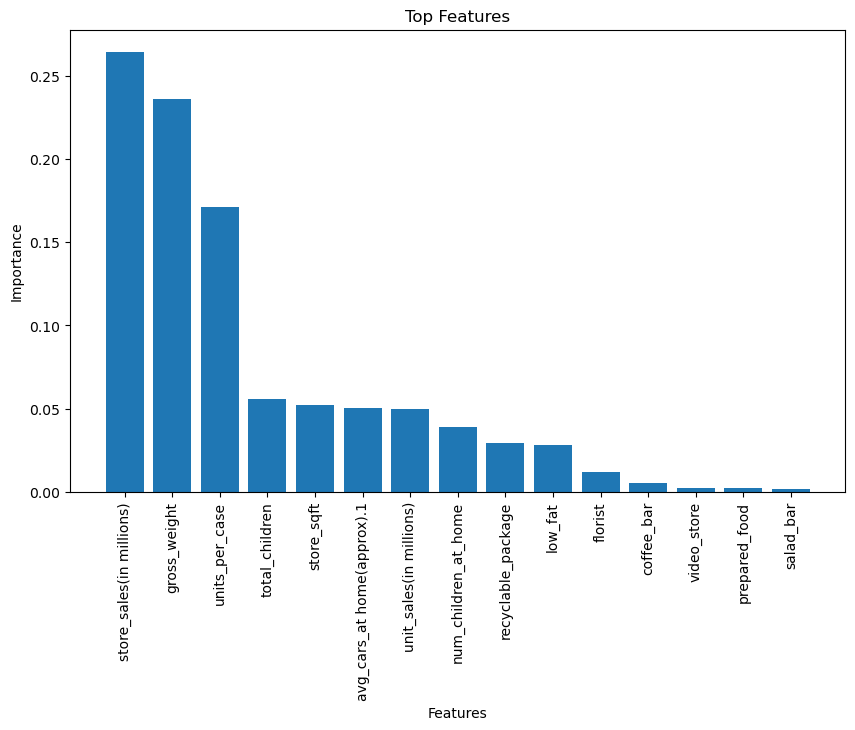

In [82]:
model_imp('randomforestregressor')

In [67]:
importance

array([0.26476588, 0.04975569, 0.0551941 , 0.03860028, 0.04984884,
       0.23684342, 0.0291929 , 0.02798141, 0.17151919, 0.05279327,
       0.00565114, 0.00251   , 0.00172489, 0.00226122, 0.01135777])

### Submission

In [19]:
import subprocess
def make_sub(pred_y,sub_data=df_test,name='default'):
    df_submission = pd.DataFrame()
    df_submission['id']=df_test['id']
    df_submission['cost']=pred_y
    df_submission.to_csv(f'submission-{name}.csv', index=False)
    cmd =f'kaggle competitions submit -c {compe} -f submission-{name}.csv -m "Message"'
    subprocess.run(cmd, shell=True)
    print(f'succesully saved - {name}')

In [79]:
preds
make_sub(preds,name='rf2')

100%|██████████| 3.01M/3.01M [00:01<00:00, 2.67MB/s]


Successfully submitted to Regression with a Tabular Media Campaign Cost Datasetsuccesully saved - rf2


In [78]:
preds

array([102.63,  51.54,  93.67, ..., 112.42,  51.  , 127.42])